In [2]:
import os
os.chdir('../')

In [3]:
os.getcwd()

'/nfs/homedirs/geisler/code/robust_gnns_at_scale_publication'

In [4]:
import itertools
import json
import seml
import pandas as pd
import numpy as np
#from run_seml import run
from matplotlib import pyplot as plt
import matplotlib
import pylab
import seaborn as sns
import scipy.stats as stats
import re
from collections import defaultdict

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
from notebooks import mpl_latex
matplotlib.rcParams['axes.unicode_minus'] = False

ImportError: cannot import name 'mpl_latex' from 'notebooks' (unknown location)

In [5]:
#mpl_latex.enable_production_mode()

In [5]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

df_tmp = pd.read_csv('cache/neurips_local_attacks.csv', index_col=0)
df_tmp['result.results'] = df_tmp['result.results'].apply(lambda string: string.replace("'", '"')).apply(json.loads)

df_results = [
    pd.DataFrame(r) 
    for r in df_tmp['result.results']
]

for df_result, (_, df_experiment) in zip(df_results, df_tmp.iterrows()):
    df_result = pd.DataFrame(df_result) 
    df_result['dataset'] = df_experiment['config.dataset']
    df_result['attack'] = df_experiment['config.attack']
    df_result['seed'] = df_experiment['config.seed']
    df_result['batch_id'] = df_experiment['batch_id']
    df_result['original_id'] = df_experiment['_id']
    df_result['make_undirected'] = df_experiment['config.make_undirected']
    
df_results = pd.concat(df_results,  ignore_index=True)

df_results[df_results['attack'] == 'LocalDICE'].label.unique()

df_results.columns

df_experiments = seml.get_results('neurips21_local_attack',
                                  to_data_frame=True,
                                  fields=['batch_id', 'slurm', 'config', 'result'])
df_experiments = df_experiments[df_experiments.batch_id >= 6]

df_experiments_coraciteseer = seml.get_results('neurips21_local_attack_coraciteseer',
                                               to_data_frame=True,
                                               fields=['batch_id', 'slurm', 'config', 'result'])

df_csv = pd.read_csv('cache/neurips_local_attacks.csv', index_col=0)
df_csv['result.results'] = df_csv['result.results'].apply(lambda string: string.replace("'", '"')).apply(json.loads)

df_experiments = pd.concat([df_experiments, df_experiments_coraciteseer, df_csv], ignore_index=True)
df_experiments.head()

In [89]:
df_experiments = seml.get_results('neurips21_cr_local_attack',
                                  to_data_frame=True,
                                  fields=['batch_id', 'slurm', 'config', 'result'])

df_experiments = df_experiments[(df_experiments.batch_id >= 8) | ((df_experiments['config.model_label'] != 'Vanilla SGC') & (df_experiments['config.surrogate_model_label'] != 'Vanilla SGC'))]
df_experiments.head()

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


,_id,batch_id,slurm.experiments_per_job,slurm.sbatch_options.time,slurm.sbatch_options.nodes,slurm.sbatch_options.cpus-per-task,slurm.sbatch_options.mem,slurm.sbatch_options.gres,slurm.sbatch_options.job-name,slurm.sbatch_options.array,slurm.sbatch_options.output,slurm.array_id,slurm.task_id,config.overwrite,config.db_collection,config.dataset,config.attack,config.attack_params.lr_factor,config.nodes,config.nodes_topk,config.epsilons,config.min_node_degree,config.seed,config.artifact_dir,config.model_storage_type,config.model_label,config.surrogate_model_storage_type,config.surrogate_model_label,config.data_dir,config.binary_attr,config.make_undirected,config.data_device,config.device,config.debug_level,config.evaluate_poisoning,result.results,config.config_hash
0,91,2,4,1-00:00,1,4,16G,gpu:1,rgnn_at_scale_attack_evasion_local_transfer_2,0-52,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6512642,0,91,neurips21_cr_local_attack,cora_ml,LocalPRBCD,0.05,None,40,[0.1],None,0,cache,pretrained,Vanilla GCN,pretrained,Vanilla GCN,datasets/,False,True,cpu,0,info,True,"[{'label': 'Vanilla GCN', 'epsilon': 0.1, 'n_p...",NaN
1,92,2,4,1-00:00,1,4,16G,gpu:1,rgnn_at_scale_attack_evasion_local_transfer_2,0-52,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6512642,0,92,neurips21_cr_local_attack,cora_ml,LocalPRBCD,0.05,None,40,[0.1],None,1,cache,pretrained,Vanilla GCN,pretrained,Vanilla GCN,datasets/,False,True,cpu,0,info,True,"[{'label': 'Vanilla GCN', 'epsilon': 0.1, 'n_p...",NaN
2,93,2,4,1-00:00,1,4,16G,gpu:1,rgnn_at_scale_attack_evasion_local_transfer_2,0-52,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6512642,0,93,neurips21_cr_local_attack,cora_ml,LocalPRBCD,0.05,None,40,[0.1],None,5,cache,pretrained,Vanilla GCN,pretrained,Vanilla GCN,datasets/,False,True,cpu,0,info,True,"[{'label': 'Vanilla GCN', 'epsilon': 0.1, 'n_p...",NaN
3,94,2,4,1-00:00,1,4,16G,gpu:1,rgnn_at_scale_attack_evasion_local_transfer_2,0-52,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6512642,0,94,neurips21_cr_local_attack,citeseer,LocalPRBCD,0.05,None,40,[0.1],None,0,cache,pretrained,Vanilla GCN,pretrained,Vanilla GCN,datasets/,False,True,cpu,0,info,True,"[{'label': 'Vanilla GCN', 'epsilon': 0.1, 'n_p...",NaN
4,95,2,4,1-00:00,1,4,16G,gpu:1,rgnn_at_scale_attack_evasion_local_transfer_2,0-52,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6512642,1,95,neurips21_cr_local_attack,citeseer,LocalPRBCD,0.05,None,40,[0.1],None,1,cache,pretrained,Vanilla GCN,pretrained,Vanilla GCN,datasets/,False,True,cpu,0,info,True,"[{'label': 'Vanilla GCN', 'epsilon': 0.1, 'n_p...",NaN


In [90]:
df_experiments = pd.concat((df_experiments, pd.read_csv('/nfs/students/schmidtt/neurips_rebutal/neurips_rebutal_local_attacks.csv')), ignore_index=True)
df_experiments.head()

,_id,batch_id,slurm.experiments_per_job,slurm.sbatch_options.time,slurm.sbatch_options.nodes,slurm.sbatch_options.cpus-per-task,slurm.sbatch_options.mem,slurm.sbatch_options.gres,slurm.sbatch_options.job-name,slurm.sbatch_options.array,slurm.sbatch_options.output,slurm.array_id,slurm.task_id,config.overwrite,config.db_collection,config.dataset,config.attack,config.attack_params.lr_factor,config.nodes,config.nodes_topk,config.epsilons,config.min_node_degree,config.seed,config.artifact_dir,config.model_storage_type,config.model_label,config.surrogate_model_storage_type,config.surrogate_model_label,config.data_dir,config.binary_attr,config.make_undirected,config.data_device,config.device,config.debug_level,config.evaluate_poisoning,result.results,config.config_hash,Unnamed: 0
0,91,2,4,1-00:00,1,4,16G,gpu:1,rgnn_at_scale_attack_evasion_local_transfer_2,0-52,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6512642.0,0.0,91,neurips21_cr_local_attack,cora_ml,LocalPRBCD,0.05,None,40,[0.1],None,0,cache,pretrained,Vanilla GCN,pretrained,Vanilla GCN,datasets/,False,True,cpu,0,info,True,"[{'label': 'Vanilla GCN', 'epsilon': 0.1, 'n_p...",NaN,NaN
1,92,2,4,1-00:00,1,4,16G,gpu:1,rgnn_at_scale_attack_evasion_local_transfer_2,0-52,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6512642.0,0.0,92,neurips21_cr_local_attack,cora_ml,LocalPRBCD,0.05,None,40,[0.1],None,1,cache,pretrained,Vanilla GCN,pretrained,Vanilla GCN,datasets/,False,True,cpu,0,info,True,"[{'label': 'Vanilla GCN', 'epsilon': 0.1, 'n_p...",NaN,NaN
2,93,2,4,1-00:00,1,4,16G,gpu:1,rgnn_at_scale_attack_evasion_local_transfer_2,0-52,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6512642.0,0.0,93,neurips21_cr_local_attack,cora_ml,LocalPRBCD,0.05,None,40,[0.1],None,5,cache,pretrained,Vanilla GCN,pretrained,Vanilla GCN,datasets/,False,True,cpu,0,info,True,"[{'label': 'Vanilla GCN', 'epsilon': 0.1, 'n_p...",NaN,NaN
3,94,2,4,1-00:00,1,4,16G,gpu:1,rgnn_at_scale_attack_evasion_local_transfer_2,0-52,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6512642.0,0.0,94,neurips21_cr_local_attack,citeseer,LocalPRBCD,0.05,None,40,[0.1],None,0,cache,pretrained,Vanilla GCN,pretrained,Vanilla GCN,datasets/,False,True,cpu,0,info,True,"[{'label': 'Vanilla GCN', 'epsilon': 0.1, 'n_p...",NaN,NaN
4,95,2,4,1-00:00,1,4,16G,gpu:1,rgnn_at_scale_attack_evasion_local_transfer_2,0-52,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6512642.0,1.0,95,neurips21_cr_local_attack,citeseer,LocalPRBCD,0.05,None,40,[0.1],None,1,cache,pretrained,Vanilla GCN,pretrained,Vanilla GCN,datasets/,False,True,cpu,0,info,True,"[{'label': 'Vanilla GCN', 'epsilon': 0.1, 'n_p...",NaN,NaN


In [91]:
from functools import partial

def _mark_best_and_second_best(vector: np.ndarray, 
                               first_mark: str = r'\textbf',
                               second_mark: str = r'\underline',
                               is_higher_better : bool = True) -> np.ndarray:
    vector = vector.astype(object)
    values = np.unique(vector[vector == vector])
    if not len(values):
        return vector
    
    if first_mark:
        if is_higher_better:
            mask = vector == values[-1]
        else:
            mask = vector == values[0]
        for i in mask.nonzero()[0]:
            vector[i] = first_mark + '{' + vector[i] + '}'
    if second_mark:
        if is_higher_better:
            mask = vector == values[-2]
        else:
            mask = vector == values[1]
        for i in mask.nonzero()[0]:
            vector[i] = second_mark + '{' + vector[i] + '}'
    return vector
    

def mark_best_and_second_best(df: pd.DataFrame, 
                              first_mark: str = r'\textbf',
                              second_mark: str = r'\underline',
                              axis: int = 0,
                              is_higher_better : bool = True) -> pd.DataFrame:
    df[:] = np.apply_along_axis(
        partial(_mark_best_and_second_best, first_mark=first_mark, 
                second_mark=second_mark, is_higher_better=is_higher_better),
        axis=axis,
        arr=df.values
    )
    return df

In [92]:
attack_times = ['evasion', 'poisoning']

In [93]:
df_experiments.columns

Index(['_id', 'batch_id', 'slurm.experiments_per_job',
       'slurm.sbatch_options.time', 'slurm.sbatch_options.nodes',
       'slurm.sbatch_options.cpus-per-task', 'slurm.sbatch_options.mem',
       'slurm.sbatch_options.gres', 'slurm.sbatch_options.job-name',
       'slurm.sbatch_options.array', 'slurm.sbatch_options.output',
       'slurm.array_id', 'slurm.task_id', 'config.overwrite',
       'config.db_collection', 'config.dataset', 'config.attack',
       'config.attack_params.lr_factor', 'config.nodes', 'config.nodes_topk',
       'config.epsilons', 'config.min_node_degree', 'config.seed',
       'config.artifact_dir', 'config.model_storage_type',
       'config.model_label', 'config.surrogate_model_storage_type',
       'config.surrogate_model_label', 'config.data_dir', 'config.binary_attr',
       'config.make_undirected', 'config.data_device', 'config.device',
       'config.debug_level', 'config.evaluate_poisoning', 'result.results',
       'config.config_hash', 'Unnamed: 0'

latest_filter_columns = ['config.dataset', 'config.attack', 'config.model_label']

batch_ids = df_experiments.groupby(latest_filter_columns).batch_id.max().unique()

batch_ids

df_experiments = df_experiments[df_experiments.batch_id.isin(batch_ids)].copy()

df_experiments

df_evaluate = seml.get_results('kdd21_rgnn_at_scale_local_attack_evaluate',
                                  to_data_frame=True,
                                  fields=['batch_id', 'slurm', 'config', 'result'])

In [94]:
df_results = []
for row in df_experiments['result.results']:
    if isinstance(row, str):
        import ast
        row = ast.literal_eval(row)
    df_tmp = pd.DataFrame(row)

    for attack_time in attack_times:
        if attack_time in df_tmp.columns:
            df_tmp = df_tmp.drop(columns=[attack_time]).join(df_tmp[attack_time].apply(pd.Series).add_prefix(f'{attack_time}.'))
    
    df_results.append(df_tmp)


pd.concat(df_results, ignore_index=True)

,label,epsilon,n_perturbations,degree,target,node_id,perturbed_edges,evasion.logits,evasion.initial_logits,evasion.logit_target,evasion.logit_best_non_target,evasion.confidence_target,evasion.confidence_non_target,evasion.margin,evasion.initial_logit_target,evasion.initial_logit_best_non_target,evasion.initial_confidence_target,evasion.initial_confidence_non_target,evasion.initial_margin,poisoning.logits,poisoning.initial_logits,poisoning.logit_target,poisoning.logit_best_non_target,poisoning.confidence_target,poisoning.confidence_non_target,poisoning.margin,poisoning.initial_logit_target,poisoning.initial_logit_best_non_target,poisoning.initial_confidence_target,poisoning.initial_confidence_non_target,poisoning.initial_margin
0,Vanilla GCN,0.10,25,246,2,2259,"[[2259, 2259, 2259, 2259, 2259, 2259, 2259, 22...","[[-8.602177619934082, 1.8351378440856934, 16.8...","[[-7.895978927612305, -1.6445636749267578, 18....",-3.576278e-07,-14.989756,1.000000,3.090522e-07,0.999999,0.000000,-20.275770,1.000000,1.564389e-09,1.000000,"[[-1.231191635131836, 6.418247699737549, 17.85...","[[-7.895978927612305, -1.6445636749267578, 18....",-0.000011,-11.437345,0.999989,0.000011,0.999978,0.000000,-20.275770,1.000000,1.564389e-09,1.000000
1,Vanilla GCN,0.10,15,152,6,1787,"[[1787, 1787, 1787, 1787, 1787, 1787, 1787, 17...","[[-5.166262626647949, 3.2830424308776855, -3.2...","[[-4.551710605621338, 0.5495458245277405, -2.7...",-1.784404e-04,-8.634551,0.999822,1.778534e-04,0.999644,-0.000004,-12.543782,0.999996,3.567012e-06,0.999993,"[[-0.8216807842254639, 5.458247184753418, -4.4...","[[-4.551710605621338, 0.5495458245277405, -2.7...",-0.000203,-8.506680,0.999798,0.000202,0.999595,-0.000004,-12.543782,0.999996,3.567012e-06,0.999993
2,Vanilla GCN,0.10,7,74,2,1933,"[[1933, 1933, 1933, 1933, 1933, 1933, 1933], [...","[[-4.466063976287842, 0.49066370725631714, 9.4...","[[-4.119922161102295, -1.5992789268493652, 10....",-1.461399e-04,-8.989985,0.999854,1.246519e-04,0.999729,-0.000016,-12.098062,0.999984,5.570300e-06,0.999979,"[[-1.704158067703247, 2.5438051223754883, 10.0...","[[-4.119922161102295, -1.5992789268493652, 10....",-0.000544,-7.549968,0.999456,0.000526,0.998930,-0.000016,-12.098062,0.999984,5.570300e-06,0.999979
3,Vanilla GCN,0.10,5,49,2,264,"[[264, 264, 264, 264, 264], [636, 709, 936, 22...","[[-3.392787456512451, -2.527449369430542, 9.42...","[[-3.0549895763397217, -2.557900905609131, 10....",-1.401803e-04,-9.022958,0.999860,1.206089e-04,0.999739,-0.000022,-11.514192,0.999978,9.987346e-06,0.999968,"[[-0.9986565709114075, -2.8932080268859863, 10...","[[-3.0549895763397217, -2.557900905609131, 10....",-0.000620,-7.424588,0.999380,0.000596,0.998784,-0.000022,-11.514192,0.999978,9.987346e-06,0.999968
4,Vanilla GCN,0.10,3,32,1,1063,"[[1063, 1063, 1063], [620, 622, 1523]]","[[-3.2174274921417236, 9.57988166809082, -3.20...","[[-2.9113497734069824, 9.973325729370117, -3.1...",-5.364274e-05,-10.324079,0.999946,3.283293e-05,0.999914,-0.000024,-11.950407,0.999976,6.456604e-06,0.999970,"[[-1.1691789627075195, 10.669466018676758, -3....","[[-2.9113497734069824, 9.973325729370117, -3.1...",-0.000078,-9.701397,0.999922,0.000061,0.999860,-0.000024,-11.950407,0.999976,6.456604e-06,0.999970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,Vanilla GDC,0.75,3,4,2,1619,"[[1619.0, 1619.0, 1619.0], [1434.0, 1744.0, 10...","[[-0.5807417035102844, -0.37924808263778687, 0...","[[0.009689830243587494, -0.32081925868988037, ...",-1.720839e+00,-0.727220,0.178916,4.832507e-01,-0.304335,-0.931717,-1.777820,0.393877,1.690061e-01,0.224871,"[[-0.1253553032875061, -0.5217583775520325, -0...","[[0.009689830243587494, -0.32081925868988037, ...",-2.835739,-0.290938,0.058675,0.747562,-0.688887,-0.931717,-1.777820,0.393877,1.690061e-01,0.224871
10956,Vanilla GDC,0.75,6,8,3,1988,"[[1988.0, 1988.0, 1988.0, 1988.0, 1988.0, 1988...","[[1.7012050151824951, 0.2871513366699219, -0.8...","[[1.57672727108001

In [95]:
for df_result, (_, df_experiment) in zip(df_results, df_experiments.iterrows()):
    df_result['dataset'] = df_experiment['config.dataset']
    df_result['attack'] = df_experiment['config.attack']
    df_result['seed'] = df_experiment['config.seed']
    df_result['batch_id'] = df_experiment['batch_id']
    df_result['original_id'] = df_experiment['_id']
    df_result['make_undirected'] = df_experiment['config.make_undirected']
    df_result['surrogate_model_label'] = df_experiment['config.surrogate_model_label']

df_results = pd.concat(df_results, ignore_index=True)
#df_results = df_results.sort_values('batch_id')

#df_results = df_results.drop_duplicates([
#    'label', 'surrogate_model_label', 'epsilon', 'node_id', 'dataset', 'attack', 'seed', 'make_undirected'
#], keep='last')

df_results

,label,epsilon,n_perturbations,degree,target,node_id,perturbed_edges,evasion.logits,evasion.initial_logits,evasion.logit_target,evasion.logit_best_non_target,evasion.confidence_target,evasion.confidence_non_target,evasion.margin,evasion.initial_logit_target,evasion.initial_logit_best_non_target,evasion.initial_confidence_target,evasion.initial_confidence_non_target,evasion.initial_margin,poisoning.logits,poisoning.initial_logits,poisoning.logit_target,poisoning.logit_best_non_target,poisoning.confidence_target,poisoning.confidence_non_target,poisoning.margin,poisoning.initial_logit_target,poisoning.initial_logit_best_non_target,poisoning.initial_confidence_target,poisoning.initial_confidence_non_target,poisoning.initial_margin,dataset,attack,seed,batch_id,original_id,make_undirected,surrogate_model_label
0,Vanilla GCN,0.10,25,246,2,2259,"[[2259, 2259, 2259, 2259, 2259, 2259, 2259, 22...","[[-8.602177619934082, 1.8351378440856934, 16.8...","[[-7.895978927612305, -1.6445636749267578, 18....",-3.576278e-07,-14.989756,1.000000,3.090522e-07,0.999999,0.000000,-20.275770,1.000000,1.564389e-09,1.000000,"[[-1.231191635131836, 6.418247699737549, 17.85...","[[-7.895978927612305, -1.6445636749267578, 18....",-0.000011,-11.437345,0.999989,0.000011,0.999978,0.000000,-20.275770,1.000000,1.564389e-09,1.000000,cora_ml,LocalPRBCD,0,2,91,True,Vanilla GCN
1,Vanilla GCN,0.10,15,152,6,1787,"[[1787, 1787, 1787, 1787, 1787, 1787, 1787, 17...","[[-5.166262626647949, 3.2830424308776855, -3.2...","[[-4.551710605621338, 0.5495458245277405, -2.7...",-1.784404e-04,-8.634551,0.999822,1.778534e-04,0.999644,-0.000004,-12.543782,0.999996,3.567012e-06,0.999993,"[[-0.8216807842254639, 5.458247184753418, -4.4...","[[-4.551710605621338, 0.5495458245277405, -2.7...",-0.000203,-8.506680,0.999798,0.000202,0.999595,-0.000004,-12.543782,0.999996,3.567012e-06,0.999993,cora_ml,LocalPRBCD,0,2,91,True,Vanilla GCN
2,Vanilla GCN,0.10,7,74,2,1933,"[[1933, 1933, 1933, 1933, 1933, 1933, 1933], [...","[[-4.466063976287842, 0.49066370725631714, 9.4...","[[-4.119922161102295, -1.5992789268493652, 10....",-1.461399e-04,-8.989985,0.999854,1.246519e-04,0.999729,-0.000016,-12.098062,0.999984,5.570300e-06,0.999979,"[[-1.704158067703247, 2.5438051223754883, 10.0...","[[-4.119922161102295, -1.5992789268493652, 10....",-0.000544,-7.549968,0.999456,0.000526,0.998930,-0.000016,-12.098062,0.999984,5.570300e-06,0.999979,cora_ml,LocalPRBCD,0,2,91,True,Vanilla GCN
3,Vanilla GCN,0.10,5,49,2,264,"[[264, 264, 264, 264, 264], [636, 709, 936, 22...","[[-3.392787456512451, -2.527449369430542, 9.42...","[[-3.0549895763397217, -2.557900905609131, 10....",-1.401803e-04,-9.022958,0.999860,1.206089e-04,0.999739,-0.000022,-11.514192,0.999978,9.987346e-06,0.999968,"[[-0.9986565709114075, -2.8932080268859863, 10...","[[-3.0549895763397217, -2.557900905609131, 10....",-0.000620,-7.424588,0.999380,0.000596,0.998784,-0.000022,-11.514192,0.999978,9.987346e-06,0.999968,cora_ml,LocalPRBCD,0,2,91,True,Vanilla GCN
4,Vanilla GCN,0.10,3,32,1,1063,"[[1063, 1063, 1063], [620, 622, 1523]]","[[-3.2174274921417236, 9.57988166809082, -3.20...","[[-2.9113497734069824, 9.973325729370117, -3.1...",-5.364274e-05,-10.324079,0.999946,3.283293e-05,0.999914,-0.000024,-11.950407,0.999976,6.456604e-06,0.999970,"[[-1.1691789627075195, 10.669466018676758, -3....","[[-2.9113497734069824, 9.973325729370117, -3.1...",-0.000078,-9.701397,0.999922,0.000061,0.999860,-0.000024,-11.950407,0.999976,6.456604e-06,0.999970,cora_ml,LocalPRBCD,0,2,91,True,Vanilla GCN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,Vanilla GDC,0.75,3,4,2,1619,"[[1619.0, 1619.0, 1619.0], [1434.0, 1744.0, 10...","[[-0.5807417035102844, -0.37924808263778687, 0...","[[0.009689830243587494, -0.32081925868988037, ...",-1.720839e+00,-0.727220,0.178916,4.832507e-01,-0.304335,-0.931717,-1.777820,0.393877,1.690061e-01,0.224871,"[[-0.1253553032875061, -0.52175837755

In [107]:
labels_to_plot = [
    'Soft Median RPPRGo (T=5.0)',
    'Soft Median RPPRGo (T=1.0)',
    'Soft Median PPRGo (T=1.0)',
    'Soft Median RPPRGo (T=0.5)',
    #'Soft Median PPRGo (T=100.0)',
    'Soft Median PPRGo (T=20.0) LowAcc',
    'Vanilla PPRGo',
    'Vanilla PPRGo LowAcc',
    #'Vanilla GDC',
    #'Vanilla GAT',
    'Vanilla GCN',
    'Vanilla GCN (surrogate)',
    'Vanilla SGC'
]

label_order = [
    'Soft Median PPRGo',
    'Vanilla PPRGo',
    'Vanilla GCN',
    #'Vanilla GDC',
    #'Vanilla GAT',
    'Vanilla SGC'
]

labels_ours = ['Soft Median PPRGo']

In [108]:
df_results.label.unique()

array(['Vanilla GCN', 'Vanilla GDC', 'Vanilla GAT', 'Vanilla SGC',
       'Soft Medoid GDC (T=0.5)'], dtype=object)

In [109]:
dataset_map = {
    'cora_ml': 'Cora ML', #r'\textbf{Cora ML}',#'~\citep{Bojchevski2018}}', # '\rotatebox{90}{Cora ML~\citep{Bojchevski2018}}',
    'citeseer': 'Citeseer', #r'\textbf{Citeseer}',#~\citep{McCallum2000}}',
    'pubmed': r'\textbf{PubMed}',#~\citep{Sen2008}}',
    'ogbn-arxiv': r'\textbf{arXiv}',#~\citep{Hu2020}}',
    'ogbn-products': r'\textbf{Products}',#~\citep{Hu2020}}',
    'ogbn-papers100M': r'\textbf{Papers 100M}',#~\citep{Hu2020}}'
}
dataset_order = [dataset_map[k] for k in dataset_map.keys()]

In [110]:
attack_map = {
    'LocalPRBCD': 'PR-BCD', #r'\textbf{PR-BCD}',
    'LocalBatchedPRBCD': 'PR-BCD', #r'\textbf{PR-BCD}',
    'Nettack': 'Nettack', #r'\textbf{Nettack}',
    'LocalDICE': 'DICE', #r'\textbf{DICE}'
    'SGA': 'SGA' #r'\textbf{DICE}'
}
attack_order = [attack_map[k] for k in attack_map.keys()]

In [111]:
def transform_label(label: str):
    label = label.replace('RPPRGo (T=5.0)', 'PPRGo')\
        .replace('RPPRGo (T=1.0)', 'PPRGo')\
        .replace('RPPRGo (T=0.5)', 'PPRGo')\
        .replace(' (surrogate)', '')\
        .replace(' (T=20.0)', '')\
        .replace(' (T=100.0)', '')\
        .replace(' (T=1.0)', '')\
        .replace(' LowAcc', '')
    return label

In [112]:
def calc_mean_and_error(values: pd.Series, seeds: pd.Series = None, with_error=True, decimal_places: int = 3): 
    if seeds is not None:
        values, seeds = values.values, seeds.values
        seeds = seeds[~np.isnan(values)]
        values = values[~np.isnan(values)]

        idx = np.unique(seeds, return_index=True)[1]
        values = values[idx]
    
    if with_error:
        return rf'{np.mean(values):.{decimal_places}f} $\pm$ {stats.sem(values):.{decimal_places}f}'
    else:
        return rf'{np.mean(values):.{decimal_places}f}'

In [113]:
victim_c = r'Victim'
surrogate_c = r'Surrogate'
dataset_c = r'\textbf{Dataset}'
attack_c = r'\textbf{Attack}'
epsilons_c = r'Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$'
margin_c = r'Pert. margin $\tilde{\psi}$'
make_undirected_c = 'Undirected'
attack_time_c = r'Attack time'

In [114]:
nodes_for_each_budget = df_results[df_results.epsilon == 0.5].node_id.unique()

results = []

for attack_time in attack_times:
    for (dataset, attack, victim, surrogate, epsilon, make_undirected), df_group in (
        df_results
            [df_results.label.isin(labels_to_plot)]
            .groupby(['dataset', 'attack', 'label', 'surrogate_model_label', 'epsilon', 'make_undirected'])
    ):
        before_correct_rate = (df_group[f'{attack_time}.initial_margin'] >= 0).mean()
        initial_margin = calc_mean_and_error(df_group[f'{attack_time}.initial_margin'], with_error=True)
        margin = calc_mean_and_error(df_group[f'{attack_time}.margin'], with_error=True)
        flip_rate = calc_mean_and_error(
            (df_group[f'{attack_time}.margin'] < 0) & ((df_group[f'{attack_time}.initial_margin'] > 0) | (df_group[f'{attack_time}.initial_margin'].isna())), with_error=True)
        #(
        #    df_group[(df_group.margin < 0) & (df_group.initial_margin > 0)].initial_margin.count()
        #    / df_group[df_group.initial_margin > 0].initial_margin.count()
        #)

        confidence_target = calc_mean_and_error(df_group[f'{attack_time}.confidence_target'], with_error=False)
        confidence_non_target = calc_mean_and_error(df_group[f'{attack_time}.confidence_non_target'], with_error=False)
        initial_confidence_target = calc_mean_and_error(df_group[f'{attack_time}.initial_confidence_target'], with_error=False)
        initial_confidence_non_target = calc_mean_and_error(df_group[f'{attack_time}.initial_confidence_non_target'], with_error=False)

        results.append({
            attack_time_c: attack_time,
            dataset_c: dataset_map[dataset],
            surrogate_c: transform_label(surrogate),
            victim_c: transform_label(victim),
            attack_c: attack_map[attack],
            epsilons_c: epsilon,
            make_undirected_c: make_undirected,
            'before_correct_rate': before_correct_rate,
            'initial_margin': initial_margin,
            'margin': margin,
            'flip_rate': flip_rate,
            'confidence_target': confidence_target,
            'confidence_non_target': confidence_non_target,
            'initial_confidence_target': initial_confidence_target,
            'initial_confidence_non_target': initial_confidence_non_target,
        })
    
df = pd.DataFrame(results)

df[surrogate_c] = df[surrogate_c].astype("category")
df[surrogate_c].cat.set_categories(
    [transform_label(l) for l in label_order],
    inplace=True
)

df[victim_c] = df[victim_c].astype("category")
df[victim_c].cat.set_categories(
    [transform_label(l) for l in label_order],
    inplace=True
)

df[dataset_c] = df[dataset_c].astype("category")
df[dataset_c].cat.set_categories(dataset_order, inplace=True)

df

,Attack time,\textbf{Dataset},Surrogate,Victim,\textbf{Attack},"Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$",Undirected,before_correct_rate,initial_margin,margin,flip_rate,confidence_target,confidence_non_target,initial_confidence_target,initial_confidence_non_target
0,evasion,Citeseer,Vanilla GCN,Vanilla GCN,PR-BCD,0.10,True,1.0,0.809 $\pm$ 0.023,0.640 $\pm$ 0.038,0.125 $\pm$ 0.030,0.798,0.157,0.879,0.071
1,evasion,Citeseer,Vanilla GCN,Vanilla GCN,PR-BCD,0.25,True,1.0,0.631 $\pm$ 0.035,0.257 $\pm$ 0.056,0.417 $\pm$ 0.045,0.578,0.321,0.736,0.105
2,evasion,Citeseer,Vanilla GCN,Vanilla GCN,PR-BCD,0.50,True,1.0,0.578 $\pm$ 0.035,-0.100 $\pm$ 0.056,0.658 $\pm$ 0.043,0.398,0.498,0.686,0.107
3,evasion,Citeseer,Vanilla GCN,Vanilla GCN,PR-BCD,0.75,True,1.0,0.552 $\pm$ 0.036,-0.404 $\pm$ 0.052,0.775 $\pm$ 0.038,0.260,0.664,0.660,0.109
4,evasion,Citeseer,Vanilla GCN,Vanilla GCN,PR-BCD,1.00,True,1.0,0.552 $\pm$ 0.036,-0.543 $\pm$ 0.043,0.850 $\pm$ 0.033,0.193,0.735,0.660,0.109
5,evasion,Citeseer,Vanilla SGC,Vanilla SGC,PR-BCD,0.10,True,1.0,0.618 $\pm$ 0.028,0.469 $\pm$ 0.034,0.175 $\pm$ 0.035,0.673,0.204,0.747,0.129
6,evasion,Citeseer,Vanilla SGC,Vanilla SGC,PR-BCD,0.25,True,1.0,0.524 $\pm$ 0.033,0.240 $\pm$ 0.039,0.392 $\pm$ 0.045,0.520,0.280,0.651,0.127
7,evasion,Citeseer,Vanilla SGC,Vanilla SGC,PR-BCD,0.50,True,1.0,0.470 $\pm$ 0.034,-0.047 $\pm$ 0.038,0.625 $\pm$ 0.044,0.370,0.418,0.602,0.132
8,evasion,Citeseer,Vanilla SGC,Vanilla SGC,PR-BCD,0.75,True,1.0,0.439 $\pm$ 0.034,-0.262 $\pm$ 0.031,0.808 $\pm$ 0.036,0.263,0.525,0.570,0.132
9,evasion,Citeseer,Vanilla SGC,Vanilla SGC,PR-BCD,1.00,True,1.0,0.439 $\pm$ 0.034,-0.382 $\pm$ 0.026,0.908 $\pm$ 0.026,0.209,0.591,0.570,0.132


# Table with flip rate

In [115]:
epsilons = [0.1, 0.25, 0.5, 1]

df_piv = pd.pivot_table(
    df[
        df[epsilons_c].isin(epsilons)
        #& (df[attack_c] == 'PR-BCD')
        & (
            (df.Undirected & df[dataset_c].isin([dataset_map['cora_ml'], dataset_map['citeseer']]))
            | (~df.Undirected & df[dataset_c].isin([dataset_map['ogbn-products'], dataset_map['ogbn-papers100M']]))
        )
    ], 
    index=[dataset_c, surrogate_c, victim_c, attack_time_c], 
    columns=[attack_c, epsilons_c], #['type', attack_c, ' '], 
    values='flip_rate',
    aggfunc=lambda x: ' '.join(x)
)

#for epsilon in epsilons:
#    current_columns = [c for c in df_piv.columns if c[1] == epsilon]
#    df_piv[current_columns] = df_piv[current_columns].groupby(dataset_c).apply(
#        partial(mark_best_and_second_best, first_mark=r'\textbf', second_mark='', axis=0, is_higher_better=False)
#    )
    
#df_piv = df_piv.fillna('-')
    
#df_piv.index = pd.MultiIndex.from_tuples([
#    (attack_time, dataset, fr'\underline{{{surrogate}}}' if surrogate in labels_ours else surrogate, fr'\underline{{{victim}}}' if victim in labels_ours else victim) 
#    for dataset, victim, surrogate, attack_time in df_piv.index
#])

df_piv

\textbf{Attack}                                                  PR-BCD  \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                  0.10   
\textbf{Dataset} Surrogate   Victim      Attack time                      
Cora ML          Vanilla GCN Vanilla GCN evasion      0.283 $\pm$ 0.041   
                                         poisoning    0.333 $\pm$ 0.043   
                 Vanilla SGC Vanilla GCN evasion                    NaN   
                                         poisoning                  NaN   
                             Vanilla SGC evasion      0.292 $\pm$ 0.042   
                                         poisoning    0.300 $\pm$ 0.042   
Citeseer         Vanilla GCN Vanilla GCN evasion      0.125 $\pm$ 0.030   
                                         poisoning    0.217 $\pm$ 0.038   
                 Vanilla SGC Vanilla GCN evasion                    NaN   
                                         poisoning                  NaN   
                             Vanilla SGC evasion      0.175 $\pm$ 0.035   
                                         poisoning    0.208 $\pm$ 0.037   

\textbf{Attack}                                                          \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                  0.25   
\textbf{Dataset} Surrogate   Victim      Attack time                      
Cora ML          Vanilla GCN Vanilla GCN evasion      0.375 $\pm$ 0.044   
                                         poisoning    0.458 $\pm$ 0.046   
                 Vanilla SGC Vanilla GCN evasion                    NaN   
                                         poisoning                  NaN   
                             Vanilla SGC evasion      0.450 $\pm$ 0.046   
                                         poisoning    0.500 $\pm$ 0.046   
Citeseer         Vanilla GCN Vanilla GCN evasion      0.417 $\pm$ 0.045   
                                         poisoning    0.525 $\pm$ 0.046   
                 Vanilla SGC Vanilla GCN evasion                    NaN   
                                         poisoning                  NaN   
                             Vanilla SGC evasion      0.392 $\pm$ 0.045   
                                         poisoning    0.492 $\pm$ 0.046   

\textbf{Attack}                                                          \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                  0.50   
\textbf{Dataset} Surrogate   Victim      Attack time                      
Cora ML          Vanilla GCN Vanilla GCN evasion      0.650 $\pm$ 0.044   
                                         poisoning    0.792 $\pm$ 0.037   
                 Vanilla SGC Vanilla GCN evasion                    NaN   
                                         poisoning                  NaN   
                             Vanilla SGC evasion      0.567 $\pm$ 0.045   
                                         poisoning    0.658 $\pm$ 0.043   
Citeseer         Vanilla GCN Vanilla GCN evasion      0.658 $\pm$ 0.043   
                                         poisoning    0.775 $\pm$ 0.038   
                 Vanilla SGC Vanilla GCN evasion                    NaN   
                                         poisoning                  NaN   
                             Vanilla SGC evasion      0.625 $\pm$ 0.044   
                                         poisoning    0.767 $\pm$ 0.039   

\textbf{Attack}                                                          \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                  1.00   
\textbf{Dataset} Surrogate   Victim      Attack time                      
Cora ML          Vanilla GCN Vanilla GCN evasion      0.958 $\pm$ 0.018   
                                         poisoning    0.967 $\pm$ 0.016   
                 Vanilla SGC Vanilla GCN evasion                    NaN   
                                         poisoning                  NaN   
                             Vanilla SGC evasion      0.967 $\pm$ 0.016   
                      

In [117]:
for attack in df[attack_c].unique():
    for dataset in df[dataset_c].unique():
        print(f'### {attack} on {dataset}')
        print(f'')
        if attack == 'PR-BCD': 
            df_tmp = df_piv.iloc[((df_piv.reset_index()[surrogate_c] == df_piv.reset_index()[victim_c]) & (df_piv.reset_index()[dataset_c] == dataset)).values, df_piv.columns.get_level_values(0)==attack]
        else:
            df_tmp = df_piv.iloc[((df_piv.reset_index()[surrogate_c] == 'Vanilla SGC') & (df_piv.reset_index()[dataset_c] == dataset)).values, df_piv.columns.get_level_values(0)==attack]

        print(df_tmp.reset_index()\
            #.sort_index(level=1, ascending=False, sort_remaining=False)\
            #.sort_index(level=0, ascending=True, sort_remaining=True)\
            .to_markdown()
        )


### PR-BCD on Citeseer

|    | ('\\textbf{Dataset}', '')   | ('Surrogate', '')   | ('Victim', '')   | ('Attack time', '')   | ('PR-BCD', 0.1)   | ('PR-BCD', 0.25)   | ('PR-BCD', 0.5)   | ('PR-BCD', 1.0)   |
|---:|:----------------------------|:--------------------|:-----------------|:----------------------|:------------------|:-------------------|:------------------|:------------------|
|  0 | Citeseer                    | Vanilla GCN         | Vanilla GCN      | evasion               | 0.125 $\pm$ 0.030 | 0.417 $\pm$ 0.045  | 0.658 $\pm$ 0.043 | 0.850 $\pm$ 0.033 |
|  1 | Citeseer                    | Vanilla GCN         | Vanilla GCN      | poisoning             | 0.217 $\pm$ 0.038 | 0.525 $\pm$ 0.046  | 0.775 $\pm$ 0.038 | 0.942 $\pm$ 0.021 |
|  2 | Citeseer                    | Vanilla SGC         | Vanilla SGC      | evasion               | 0.175 $\pm$ 0.035 | 0.392 $\pm$ 0.045  | 0.625 $\pm$ 0.044 | 0.908 $\pm$ 0.026 |
|  3 | Citeseer                    | Vanilla SGC         | Va

In [106]:
epsilons = [0.1, 0.25, 0.5, 1]

df_piv = pd.pivot_table(
    df[
        df[epsilons_c].isin(epsilons)
        #& (df[attack_c] == 'PR-BCD')
        & (
            (df.Undirected & df[dataset_c].isin([dataset_map['cora_ml'], dataset_map['citeseer']]))
            | (~df.Undirected & df[dataset_c].isin([dataset_map['ogbn-products'], dataset_map['ogbn-papers100M']]))
        )
    ], 
    index=[dataset_c, surrogate_c, victim_c, attack_time_c], 
    columns=[attack_c, epsilons_c], #['type', attack_c, ' '], 
    values='flip_rate',
    aggfunc=lambda x: ' '.join(x)
)

#for epsilon in epsilons:
#    current_columns = [c for c in df_piv.columns if c[1] == epsilon]
#    df_piv[current_columns] = df_piv[current_columns].groupby(dataset_c).apply(
#        partial(mark_best_and_second_best, first_mark=r'\textbf', second_mark='', axis=0, is_higher_better=False)
#    )
    
#df_piv = df_piv.fillna('-')
    
#df_piv.index = pd.MultiIndex.from_tuples([
#    (attack_time, dataset, fr'\underline{{{surrogate}}}' if surrogate in labels_ours else surrogate, fr'\underline{{{victim}}}' if victim in labels_ours else victim) 
#    for dataset, victim, surrogate, attack_time in df_piv.index
#])

df_piv

\textbf{Attack}                                                  PR-BCD  \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                  0.10   
\textbf{Dataset} Surrogate   Victim      Attack time                      
Cora ML          Vanilla GCN Vanilla GCN evasion      0.283 $\pm$ 0.041   
                                         poisoning    0.333 $\pm$ 0.043   
                             Vanilla GAT evasion      0.225 $\pm$ 0.038   
                                         poisoning    0.333 $\pm$ 0.043   
                 Vanilla GAT Vanilla GAT evasion      0.517 $\pm$ 0.046   
                                         poisoning    0.333 $\pm$ 0.043   
                 Vanilla SGC Vanilla GCN evasion                    NaN   
                                         poisoning                  NaN   
                             Vanilla SGC evasion      0.292 $\pm$ 0.042   
                                         poisoning    0.300 $\pm$ 0.042   
Citeseer         Vanilla GCN Vanilla GCN evasion      0.125 $\pm$ 0.030   
                                         poisoning    0.217 $\pm$ 0.038   
                             Vanilla GAT evasion      0.217 $\pm$ 0.038   
                                         poisoning    0.317 $\pm$ 0.043   
                 Vanilla GAT Vanilla GAT evasion      0.600 $\pm$ 0.045   
                                         poisoning    0.208 $\pm$ 0.037   
                 Vanilla SGC Vanilla GCN evasion                    NaN   
                                         poisoning                  NaN   
                             Vanilla SGC evasion      0.175 $\pm$ 0.035   
                                         poisoning    0.208 $\pm$ 0.037   

\textbf{Attack}                                                          \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                  0.25   
\textbf{Dataset} Surrogate   Victim      Attack time                      
Cora ML          Vanilla GCN Vanilla GCN evasion      0.375 $\pm$ 0.044   
                                         poisoning    0.458 $\pm$ 0.046   
                             Vanilla GAT evasion      0.358 $\pm$ 0.044   
                                         poisoning    0.450 $\pm$ 0.046   
                 Vanilla GAT Vanilla GAT evasion      0.550 $\pm$ 0.046   
                                         poisoning    0.450 $\pm$ 0.046   
                 Vanilla SGC Vanilla GCN evasion                    NaN   
                                         poisoning                  NaN   
                             Vanilla SGC evasion      0.450 $\pm$ 0.046   
                                         poisoning    0.500 $\pm$ 0.046   
Citeseer         Vanilla GCN Vanilla GCN evasion      0.417 $\pm$ 0.045   
                                         poisoning    0.525 $\pm$ 0.046   
                             Vanilla GAT evasion      0.408 $\pm$ 0.045   
                                         poisoning    0.583 $\pm$ 0.045   
                 Vanilla GAT Vanilla GAT evasion      0.633 $\pm$ 0.044   
                                         poisoning    0.383 $\pm$ 0.045   
                 Vanilla SGC Vanilla GCN evasion                    NaN   
                                         poisoning                  NaN   
                             Vanilla SGC evasion      0.392 $\pm$ 0.045   
                                         poisoning    0.492 $\pm$ 0.046   

\textbf{Attack}                                                          \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                  0.50   
\textbf{Dataset} Surrogate   Victim      Attack time                      
Cora ML          Vanilla GCN Vanilla GCN evasion      0.650 $\pm$ 0.044   
                                         poisoning    0.792 $\pm$ 0.037   
                             Vanilla GAT evasion      0.533 $\pm$ 0.046   
                                         poisoning    0.608 $\pm$ 0.045   
                 Vanill

In [ ]:
'2'/2

First

In [85]:
epsilons = [0.1, 0.25, 0.5, 1]

df_piv = pd.pivot_table(
    df[
        df[epsilons_c].isin(epsilons)
        #& (df[attack_c] == 'PR-BCD')
        & (
            (df.Undirected & df[dataset_c].isin([dataset_map['cora_ml'], dataset_map['citeseer']]))
            | (~df.Undirected & df[dataset_c].isin([dataset_map['ogbn-products'], dataset_map['ogbn-papers100M']]))
        )
    ], 
    index=[dataset_c, architecture_c, attack_time_c], 
    columns=[attack_c, epsilons_c], #['type', attack_c, ' '], 
    values='flip_rate',
    aggfunc=lambda x: ' '.join(x)
)

for epsilon in epsilons:
    current_columns = [c for c in df_piv.columns if c[1] == epsilon]
    df_piv[current_columns] = df_piv[current_columns].groupby(dataset_c).apply(
        partial(mark_best_and_second_best, first_mark=r'\textbf', second_mark='', axis=0, is_higher_better=False)
    )
    
df_piv = df_piv.fillna('-')
    
df_piv.index = pd.MultiIndex.from_tuples([
    (dataset, fr'\underline{{{architecture}}}' if architecture in labels_ours else architecture, attack_time) 
    for dataset, architecture, attack_time in df_piv.index
])

df_piv

\textbf{Attack}                                                       Nettack  \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.10   
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.108 $\pm$ 0.028}   
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.108 $\pm$ 0.028}   

\textbf{Attack}                                                                \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.25   
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.292 $\pm$ 0.042}   
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.250 $\pm$ 0.040}   

\textbf{Attack}                                                                \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.50   
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.475 $\pm$ 0.046}   
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.517 $\pm$ 0.046}   

\textbf{Attack}                                                                \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        1.00   
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.850 $\pm$ 0.033}   
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.758 $\pm$ 0.039}   

\textbf{Attack}                                                        PR-BCD  \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.10   
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.208 $\pm$ 0.037}   
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.158 $\pm$ 0.033}   

\textbf{Attack}                                                                \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.25   
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.292 $\pm$ 0.042}   
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.308 $\pm$ 0.042}   

\textbf{Attack}                                                                \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.50   
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.500 $\pm$ 0.046}   
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.492 $\pm$ 0.046}   

\textbf{Attack}                                                                
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        1.00  
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.850 $\pm$ 0.033}  
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.700 $\pm$ 0.042}

Old models

In [70]:
epsilons = [0.1, 0.25, 0.5, 1]

df_piv = pd.pivot_table(
    df[
        df[epsilons_c].isin(epsilons)
        #& (df[attack_c] == 'PR-BCD')
        & (
            (df.Undirected & df[dataset_c].isin([dataset_map['cora_ml'], dataset_map['citeseer']]))
            | (~df.Undirected & df[dataset_c].isin([dataset_map['ogbn-products'], dataset_map['ogbn-papers100M']]))
        )
    ], 
    index=[dataset_c, architecture_c, attack_time_c], 
    columns=[attack_c, epsilons_c], #['type', attack_c, ' '], 
    values='flip_rate',
    aggfunc=lambda x: ' '.join(x)
)

for epsilon in epsilons:
    current_columns = [c for c in df_piv.columns if c[1] == epsilon]
    df_piv[current_columns] = df_piv[current_columns].groupby(dataset_c).apply(
        partial(mark_best_and_second_best, first_mark=r'\textbf', second_mark='', axis=0, is_higher_better=False)
    )
    
df_piv = df_piv.fillna('-')
    
df_piv.index = pd.MultiIndex.from_tuples([
    (dataset, fr'\underline{{{architecture}}}' if architecture in labels_ours else architecture, attack_time) 
    for dataset, architecture, attack_time in df_piv.index
])

df_piv

\textbf{Attack}                                                       Nettack  \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.10   
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.208 $\pm$ 0.037}   
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.133 $\pm$ 0.031}   

\textbf{Attack}                                                                \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.25   
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.367 $\pm$ 0.044}   
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.425 $\pm$ 0.045}   

\textbf{Attack}                                                                \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.50   
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.533 $\pm$ 0.046}   
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.667 $\pm$ 0.043}   

\textbf{Attack}                                                                
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        1.00  
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.917 $\pm$ 0.025}  
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.858 $\pm$ 0.032}

Old surrogate

In [189]:
epsilons = [0.1, 0.25, 0.5, 1]

df_piv = pd.pivot_table(
    df[
        df[epsilons_c].isin(epsilons)
        #& (df[attack_c] == 'PR-BCD')
        & (
            (df.Undirected & df[dataset_c].isin([dataset_map['cora_ml'], dataset_map['citeseer']]))
            | (~df.Undirected & df[dataset_c].isin([dataset_map['ogbn-products'], dataset_map['ogbn-papers100M']]))
        )
    ], 
    index=[dataset_c, architecture_c, attack_time_c], 
    columns=[attack_c, epsilons_c], #['type', attack_c, ' '], 
    values='flip_rate',
    aggfunc=lambda x: ' '.join(x)
)

for epsilon in epsilons:
    current_columns = [c for c in df_piv.columns if c[1] == epsilon]
    df_piv[current_columns] = df_piv[current_columns].groupby(dataset_c).apply(
        partial(mark_best_and_second_best, first_mark=r'\textbf', second_mark='', axis=0, is_higher_better=False)
    )
    
df_piv = df_piv.fillna('-')
    
df_piv.index = pd.MultiIndex.from_tuples([
    (dataset, fr'\underline{{{architecture}}}' if architecture in labels_ours else architecture, attack_time) 
    for dataset, architecture, attack_time in df_piv.index
])

df_piv

\textbf{Attack}                                                        PR-BCD  \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.10   
\textbf{Cora ML}  Vanilla GCN evasion                       0.283 $\pm$ 0.041   
                              poisoning                     0.325 $\pm$ 0.043   
                  Vanilla SGC evasion              \textbf{0.271 $\pm$ 0.029}   
                              poisoning                     0.292 $\pm$ 0.029   
\textbf{Citeseer} Vanilla GCN evasion              \textbf{0.125 $\pm$ 0.030}   
                              poisoning                     0.217 $\pm$ 0.038   
                  Vanilla SGC evasion                       0.167 $\pm$ 0.024   
                              poisoning                     0.200 $\pm$ 0.026   

\textbf{Attack}                                                                \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.25   
\textbf{Cora ML}  Vanilla GCN evasion              \textbf{0.375 $\pm$ 0.044}   
                              poisoning                     0.467 $\pm$ 0.046   
                  Vanilla SGC evasion                       0.442 $\pm$ 0.032   
                              poisoning                     0.521 $\pm$ 0.032   
\textbf{Citeseer} Vanilla GCN evasion                       0.417 $\pm$ 0.045   
                              poisoning                     0.533 $\pm$ 0.046   
                  Vanilla SGC evasion              \textbf{0.379 $\pm$ 0.031}   
                              poisoning                     0.463 $\pm$ 0.032   

\textbf{Attack}                                                                \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.50   
\textbf{Cora ML}  Vanilla GCN evasion                       0.650 $\pm$ 0.044   
                              poisoning                     0.775 $\pm$ 0.038   
                  Vanilla SGC evasion              \textbf{0.500 $\pm$ 0.046}   
                              poisoning                     0.683 $\pm$ 0.043   
\textbf{Citeseer} Vanilla GCN evasion                       0.658 $\pm$ 0.043   
                              poisoning                     0.792 $\pm$ 0.037   
                  Vanilla SGC evasion              \textbf{0.550 $\pm$ 0.046}   
                              poisoning                     0.692 $\pm$ 0.042   

\textbf{Attack}                                                                
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        1.00  
\textbf{Cora ML}  Vanilla GCN evasion                       0.958 $\pm$ 0.018  
                              poisoning                     0.975 $\pm$ 0.014  
                  Vanilla SGC evasion              \textbf{0.950 $\pm$ 0.020}  
                              poisoning                     0.967 $\pm$ 0.016  
\textbf{Citeseer} Vanilla GCN evasion                       0.850 $\pm$ 0.033  
                              poisoning                     0.933 $\pm$ 0.023  
                  Vanilla SGC evasion              \textbf{0.842 $\pm$ 0.033}  
                              poisoning                     0.950 $\pm$ 0.020

Rerun new models (batch id 9)

In [160]:
epsilons = [0.1, 0.25, 0.5, 1]

df_piv = pd.pivot_table(
    df[
        df[epsilons_c].isin(epsilons)
        #& (df[attack_c] == 'PR-BCD')
        & (
            (df.Undirected & df[dataset_c].isin([dataset_map['cora_ml'], dataset_map['citeseer']]))
            | (~df.Undirected & df[dataset_c].isin([dataset_map['ogbn-products'], dataset_map['ogbn-papers100M']]))
        )
    ], 
    index=[dataset_c, architecture_c, attack_time_c], 
    columns=[attack_c, epsilons_c], #['type', attack_c, ' '], 
    values='flip_rate',
    aggfunc=lambda x: ' '.join(x)
)

for epsilon in epsilons:
    current_columns = [c for c in df_piv.columns if c[1] == epsilon]
    df_piv[current_columns] = df_piv[current_columns].groupby(dataset_c).apply(
        partial(mark_best_and_second_best, first_mark=r'\textbf', second_mark='', axis=0, is_higher_better=False)
    )
    
df_piv = df_piv.fillna('-')
    
df_piv.index = pd.MultiIndex.from_tuples([
    (dataset, fr'\underline{{{architecture}}}' if architecture in labels_ours else architecture, attack_time) 
    for dataset, architecture, attack_time in df_piv.index
])

df_piv

\textbf{Attack}                                                             Nettack  \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                              0.10   
\textbf{Cora ML}  \underline{Soft Median PPRGo} evasion  \textbf{0.050 $\pm$ 0.020}   
                  Vanilla PPRGo                 evasion           0.075 $\pm$ 0.024   
                  Vanilla GCN                   evasion           0.208 $\pm$ 0.037   
\textbf{Citeseer} \underline{Soft Median PPRGo} evasion  \textbf{0.025 $\pm$ 0.014}   
                  Vanilla PPRGo                 evasion           0.067 $\pm$ 0.023   
                  Vanilla GCN                   evasion           0.133 $\pm$ 0.031   

\textbf{Attack}                                                                      \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                              0.25   
\textbf{Cora ML}  \underline{Soft Median PPRGo} evasion  \textbf{0.142 $\pm$ 0.032}   
                  Vanilla PPRGo                 evasion           0.250 $\pm$ 0.040   
                  Vanilla GCN                   evasion           0.367 $\pm$ 0.044   
\textbf{Citeseer} \underline{Soft Median PPRGo} evasion  \textbf{0.175 $\pm$ 0.035}   
                  Vanilla PPRGo                 evasion           0.308 $\pm$ 0.042   
                  Vanilla GCN                   evasion           0.425 $\pm$ 0.045   

\textbf{Attack}                                                                      \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                              0.50   
\textbf{Cora ML}  \underline{Soft Median PPRGo} evasion  \textbf{0.200 $\pm$ 0.037}   
                  Vanilla PPRGo                 evasion           0.375 $\pm$ 0.044   
                  Vanilla GCN                   evasion           0.533 $\pm$ 0.046   
\textbf{Citeseer} \underline{Soft Median PPRGo} evasion  \textbf{0.308 $\pm$ 0.042}   
                  Vanilla PPRGo                 evasion           0.433 $\pm$ 0.045   
                  Vanilla GCN                   evasion           0.667 $\pm$ 0.043   

\textbf{Attack}                                                                      \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                              1.00   
\textbf{Cora ML}  \underline{Soft Median PPRGo} evasion  \textbf{0.225 $\pm$ 0.038}   
                  Vanilla PPRGo                 evasion           0.442 $\pm$ 0.046   
                  Vanilla GCN                   evasion           0.892 $\pm$ 0.028   
\textbf{Citeseer} \underline{Soft Median PPRGo} evasion  \textbf{0.417 $\pm$ 0.045}   
                  Vanilla PPRGo                 evasion           0.542 $\pm$ 0.046   
                  Vanilla GCN                   evasion           0.858 $\pm$ 0.032   

\textbf{Attack}                                                                                PR-BCD  \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                                                0.10   
\textbf{Cora ML}  \underline{Soft Median PPRGo} evasion  \textbf{0.092 $\pm$ 0.026 0.033 $\pm$ 0.016}   
                  Vanilla PPRGo                 evasion           0.133 $\pm$ 0.031 0.100 $\pm$ 0.028   
                  Vanilla GCN                   evasion                             0.283 $\pm$ 0.041   
\textbf{Citeseer} \underline{Soft Median PPRGo} evasion  \textbf{0.058 $\pm$ 0.021 0.025 $\pm$ 0.014}   
                  Vanilla PPRGo                 evasion           0.083 $\pm$ 0.025 0.067 $\pm$ 0.023   
                  Vanilla GCN                   evasion                             0.125 $\pm$ 0.030   

\textbf{Attack}                                                                                        \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                                                0.25   
\textbf{Cora ML}  \underline{Soft Median PPRGo} evasion  \textbf{0.225 $\pm$ 0.038 0.133 $\pm$ 0.031}   
                  Vanilla PPRGo                 evasion 

### Batch id 12 with corrected poisoning

In [190]:
epsilons = [0.1, 0.25, 0.5, 1]

df_piv = pd.pivot_table(
    df[
        df[epsilons_c].isin(epsilons)
        #& (df[attack_c] == 'PR-BCD')
        & (
            (df.Undirected & df[dataset_c].isin([dataset_map['cora_ml'], dataset_map['citeseer']]))
            | (~df.Undirected & df[dataset_c].isin([dataset_map['ogbn-products'], dataset_map['ogbn-papers100M']]))
        )
    ], 
    index=[dataset_c, architecture_c, attack_time_c], 
    columns=[attack_c, epsilons_c], #['type', attack_c, ' '], 
    values='flip_rate',
    aggfunc=lambda x: ' '.join(x)
)

for epsilon in epsilons:
    current_columns = [c for c in df_piv.columns if c[1] == epsilon]
    df_piv[current_columns] = df_piv[current_columns].groupby(dataset_c).apply(
        partial(mark_best_and_second_best, first_mark=r'\textbf', second_mark='', axis=0, is_higher_better=False)
    )
    
df_piv = df_piv.fillna('-')
    
df_piv.index = pd.MultiIndex.from_tuples([
    (attack_time, dataset, fr'\underline{{{architecture}}}' if architecture in labels_ours else architecture) 
    for dataset, architecture, attack_time in df_piv.index
])

df_piv

\textbf{Attack}                                                        PR-BCD  \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.10   
evasion   \textbf{Cora ML}  Vanilla GCN                     0.283 $\pm$ 0.041   
poisoning \textbf{Cora ML}  Vanilla GCN                     0.325 $\pm$ 0.043   
evasion   \textbf{Cora ML}  Vanilla SGC            \textbf{0.271 $\pm$ 0.029}   
poisoning \textbf{Cora ML}  Vanilla SGC                     0.292 $\pm$ 0.029   
evasion   \textbf{Citeseer} Vanilla GCN            \textbf{0.125 $\pm$ 0.030}   
poisoning \textbf{Citeseer} Vanilla GCN                     0.217 $\pm$ 0.038   
evasion   \textbf{Citeseer} Vanilla SGC                     0.167 $\pm$ 0.024   
poisoning \textbf{Citeseer} Vanilla SGC                     0.200 $\pm$ 0.026   

\textbf{Attack}                                                                \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.25   
evasion   \textbf{Cora ML}  Vanilla GCN            \textbf{0.375 $\pm$ 0.044}   
poisoning \textbf{Cora ML}  Vanilla GCN                     0.467 $\pm$ 0.046   
evasion   \textbf{Cora ML}  Vanilla SGC                     0.442 $\pm$ 0.032   
poisoning \textbf{Cora ML}  Vanilla SGC                     0.521 $\pm$ 0.032   
evasion   \textbf{Citeseer} Vanilla GCN                     0.417 $\pm$ 0.045   
poisoning \textbf{Citeseer} Vanilla GCN                     0.533 $\pm$ 0.046   
evasion   \textbf{Citeseer} Vanilla SGC            \textbf{0.379 $\pm$ 0.031}   
poisoning \textbf{Citeseer} Vanilla SGC                     0.463 $\pm$ 0.032   

\textbf{Attack}                                                                \
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        0.50   
evasion   \textbf{Cora ML}  Vanilla GCN                     0.650 $\pm$ 0.044   
poisoning \textbf{Cora ML}  Vanilla GCN                     0.775 $\pm$ 0.038   
evasion   \textbf{Cora ML}  Vanilla SGC            \textbf{0.500 $\pm$ 0.046}   
poisoning \textbf{Cora ML}  Vanilla SGC                     0.683 $\pm$ 0.043   
evasion   \textbf{Citeseer} Vanilla GCN                     0.658 $\pm$ 0.043   
poisoning \textbf{Citeseer} Vanilla GCN                     0.792 $\pm$ 0.037   
evasion   \textbf{Citeseer} Vanilla SGC            \textbf{0.550 $\pm$ 0.046}   
poisoning \textbf{Citeseer} Vanilla SGC                     0.692 $\pm$ 0.042   

\textbf{Attack}                                                                
Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$                        1.00  
evasion   \textbf{Cora ML}  Vanilla GCN                     0.958 $\pm$ 0.018  
poisoning \textbf{Cora ML}  Vanilla GCN                     0.975 $\pm$ 0.014  
evasion   \textbf{Cora ML}  Vanilla SGC            \textbf{0.950 $\pm$ 0.020}  
poisoning \textbf{Cora ML}  Vanilla SGC                     0.967 $\pm$ 0.016  
evasion   \textbf{Citeseer} Vanilla GCN                     0.850 $\pm$ 0.033  
poisoning \textbf{Citeseer} Vanilla GCN                     0.933 $\pm$ 0.023  
evasion   \textbf{Citeseer} Vanilla SGC            \textbf{0.842 $\pm$ 0.033}  
poisoning \textbf{Citeseer} Vanilla SGC                     0.950 $\pm$ 0.020

In [161]:
df[attack_c].unique()

array(['PR-BCD', 'Nettack'], dtype=object)

In [26]:
for attack in df[attack_c].unique():
    print(df_piv.iloc[:, df_piv.columns.get_level_values(0)==attack]\
        #.sort_index(level=1, ascending=False, sort_remaining=False)\
        #.sort_index(level=0, ascending=True, sort_remaining=True)\
        .to_latex(
            #float_format='%.2f',
            caption=r'Flip rates using our local PR-BCD attack. \underline{Our approaches} are underlined. For the attack a higher value is better and for the defence a lower value is better. We highlight the \textbf{strongest defense} in bold.', 
            label='tab:appendix_localprbcdflirate',
            escape=False,
            multirow=True,
            multicolumn=True,
            column_format='llcccc'
        )
    )

\begin{table}
\centering
\caption{Flip rates using our local PR-BCD attack. \underline{Our approaches} are underlined. For the attack a higher value is better and for the defence a lower value is better. We highlight the \textbf{strongest defense} in bold.}
\label{tab:appendix_localprbcdflirate}
\begin{tabular}{llcccc}
\toprule
                     & \textbf{Attack} & \multicolumn{4}{l}{PR-BCD} \\
                     & Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$ &                        0.10 &                        0.25 &                        0.50 &                        1.00 \\
\midrule
\multirow{3}{*}{\textbf{Cora ML}} & \underline{Soft Median PPRGo} &  \textbf{0.125 $\pm$ 0.003} &  \textbf{0.208 $\pm$ 0.003} &  \textbf{0.333 $\pm$ 0.004} &  \textbf{0.417 $\pm$ 0.004} \\
                     & Vanilla PPRGo &           0.133 $\pm$ 0.003 &           0.317 $\pm$ 0.004 &           0.425 $\pm$ 0.004 &           0.583 $\pm$ 0.004 \\
                     & Vanilla GCN &         

# Some Plots

In [27]:
df_results.columns

Index(['label', 'epsilon', 'n_perturbations', 'degree', 'logits',
       'initial_logits', 'larget', 'node_id', 'perturbed_edges',
       'logit_target', 'logit_best_non_target', 'confidence_target',
       'confidence_non_target', 'margin', 'initial_logit_target',
       'initial_logit_best_non_target', 'initial_confidence_target',
       'initial_confidence_non_target', 'initial_margin', 'dataset', 'attack',
       'seed', 'batch_id', 'original_id', 'make_undirected', 'target'],
      dtype='object')

citeseer Nettack True
Architecture
Soft Median PPRGo    720
Vanilla GCN          600
Vanilla PPRGo        600
Name: epsilon, dtype: int64
citeseer PR-BCD False


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


Architecture
Soft Median PPRGo    667
Vanilla GCN          664
Vanilla PPRGo         63
Name: epsilon, dtype: int64
citeseer PR-BCD True
Architecture
Soft Median PPRGo    720
Vanilla GCN          720
Vanilla PPRGo        720
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


cora_ml Nettack True
Architecture
Soft Median PPRGo    720
Vanilla GCN          600
Vanilla PPRGo        600
Name: epsilon, dtype: int64
cora_ml PR-BCD False
Architecture
Soft Median PPRGo    690
Vanilla GCN          702
Vanilla PPRGo        690
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


cora_ml PR-BCD True
Architecture
Soft Median PPRGo    720
Vanilla GCN          720
Vanilla PPRGo        720
Name: epsilon, dtype: int64
ogbn-papers100M DICE False
Architecture
Soft Median PPRGo    200
Vanilla PPRGo        200
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases

ogbn-papers100M PR-BCD False
Architecture
Soft Median PPRGo    200
Vanilla PPRGo        200
Name: epsilon, dtype: int64
ogbn-products DICE False
Architecture
Soft Median PPRGo    600
Vanilla GCN          720
Vanilla PPRGo        600
Name: epsilon, dtype: int64
ogbn-products PR-BCD False
Architecture
Soft Median PPRGo    600
Vanilla GCN          600
Vanilla PPRGo        600
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


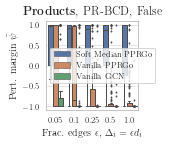

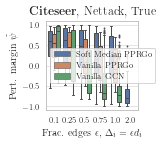

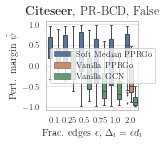

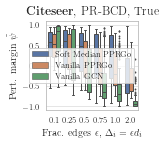

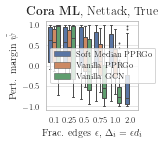

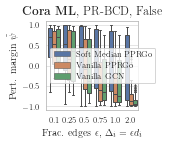

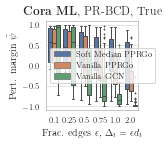

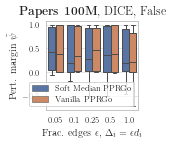

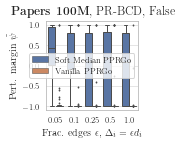

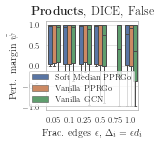

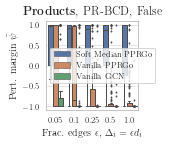

In [28]:
df_tmp = df_results.copy()
df_tmp.attack = df_tmp.attack.apply(lambda attack: attack_map[attack])

for (dataset, attack, make_undirected), df_group in (
    df_tmp[
        df_tmp.label.isin(labels_to_plot) 
        #& (df_tmp.initial_margin >= 0)
        #& (df_tmp.epsilon.isin([0.5, 1]))
        #& ((df_tmp.dataset != 'ogbn-products') | ~df_tmp.make_undirected.fillna(False))
        #   (
        #    (~df_tmp.make_undirected.fillna(False) & (df_tmp.label == 'Vanilla PPRGo'))
        #    | (df_tmp.make_undirected.fillna(True) & (df_tmp.label != 'Vanilla PPRGo'))
        #))
    ].groupby(['dataset', 'attack', 'make_undirected'])
):
    print(dataset, attack, make_undirected)
    
    df_group[architecture_c] = df_group['label'].apply(transform_label)
    hue_order = list(dict.fromkeys([
        transform_label(l) for l in labels_to_plot if l in df_group['label'].unique()
    ]).keys())
    
    print(df_group.groupby(architecture_c).epsilon.count())
    
    fig, ax = mpl_latex.newfig(width=0.30, ratio_yx=1)
    ax.set_title(f'{dataset_map[dataset]}, {attack}, {make_undirected}')
    sns.boxplot(
        x=df_group.epsilon.rename(epsilons_c),
        y=df_group.margin,
        hue=df_group[architecture_c],
        hue_order=hue_order,
        fliersize=1
    )
    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    plt.ylabel('')
    #mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin_no_leglab', fig, close_fig=False)
    plt.ylabel(margin_c)
    
    #mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin_no_legend', fig, close_fig=False)
    ax.legend(handles=handles, labels=labels)
    
    #mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin', fig, close_fig=False)
    #mpl_latex.dedicated_legend_plot(
    #    f'latex/assets/local_{attack}_{dataset}_boxplmargin_legend',
    #    mod_label=lambda l: l,
    #    ncol=3
    #)
    
plt.gcf()

citeseer Nettack True
Architecture
Soft Median PPRGo    720
Vanilla GCN          600
Vanilla PPRGo        600
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


citeseer PR-BCD False
Architecture
Soft Median PPRGo    667
Vanilla GCN          664
Vanilla PPRGo         63
Name: epsilon, dtype: int64
citeseer PR-BCD True
Architecture
Soft Median PPRGo    720
Vanilla GCN          720
Vanilla PPRGo        720
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


cora_ml Nettack True
Architecture
Soft Median PPRGo    720
Vanilla GCN          600
Vanilla PPRGo        600
Name: epsilon, dtype: int64
cora_ml PR-BCD False
Architecture
Soft Median PPRGo    690
Vanilla GCN          702
Vanilla PPRGo        690
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


cora_ml PR-BCD True
Architecture
Soft Median PPRGo    720
Vanilla GCN          720
Vanilla PPRGo        720
Name: epsilon, dtype: int64
ogbn-papers100M DICE False
Architecture
Soft Median PPRGo    200
Vanilla PPRGo        200
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


ogbn-papers100M PR-BCD False
Architecture
Soft Median PPRGo    200
Vanilla PPRGo        200
Name: epsilon, dtype: int64
ogbn-products DICE False
Architecture
Soft Median PPRGo    600
Vanilla GCN          720
Vanilla PPRGo        600
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


ogbn-products PR-BCD False
Architecture
Soft Median PPRGo    600
Vanilla GCN          600
Vanilla PPRGo        600
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


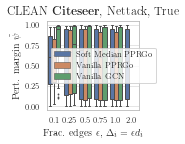

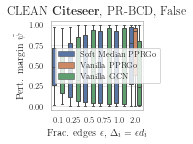

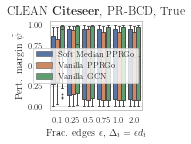

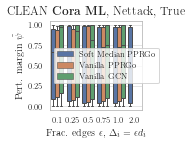

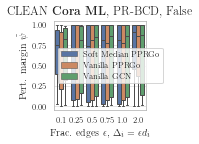

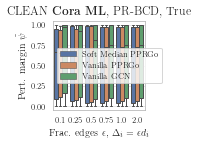

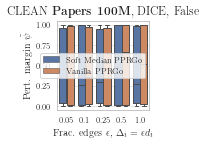

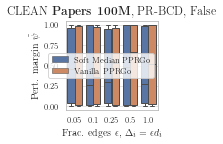

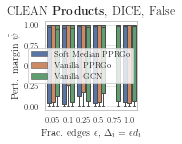

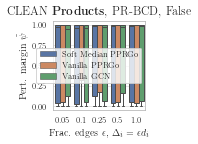

In [29]:
df_tmp = df_results.copy()
df_tmp.attack = df_tmp.attack.apply(lambda attack: attack_map[attack])

for (dataset, attack, make_undirected), df_group in (
    df_tmp[
        df_tmp.label.isin(labels_to_plot) 
        #& (df_tmp.initial_margin >= 0)
        #& (df_tmp.epsilon.isin([0.5, 1]))
        #& ((df_tmp.dataset != 'ogbn-products') | ~df_tmp.make_undirected.fillna(False))
        #   (
        #    (~df_tmp.make_undirected.fillna(False) & (df_tmp.label == 'Vanilla PPRGo'))
        #    | (df_tmp.make_undirected.fillna(True) & (df_tmp.label != 'Vanilla PPRGo'))
        #))
    ].groupby(['dataset', 'attack', 'make_undirected'])
):
    print(dataset, attack, make_undirected)
    
    df_group[architecture_c] = df_group['label'].apply(transform_label)
    hue_order = list(dict.fromkeys([
        transform_label(l) for l in labels_to_plot if l in df_group['label'].unique()
    ]).keys())
    
    print(df_group.groupby(architecture_c).epsilon.count())
    
    fig, ax = mpl_latex.newfig(width=0.30, ratio_yx=1)
    ax.set_title(f'CLEAN {dataset_map[dataset]}, {attack}, {make_undirected}')

    sns.boxplot(
        x=df_group.epsilon.rename(epsilons_c),
        y=df_group.initial_margin,
        hue=df_group[architecture_c],
        hue_order=hue_order,
        fliersize=1
    )
    
    handles, labels = ax.get_legend_handles_labels()
    #ax.get_legend().remove()
    
    plt.ylabel('')
    #mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_no_leglab', fig, close_fig=False)
    plt.ylabel(margin_c)
    
    #mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_no_legend', fig, close_fig=False)
    ax.legend(handles=handles, labels=labels)
    
    #mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin', fig, close_fig=False)
    #mpl_latex.dedicated_legend_plot(
    #    f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_legend',
    #    mod_label=lambda l: l,
    #    ncol=3
    #)

# Compare Nettack with PR-BCD

In [30]:
def transform_label(label: str):
    #if label.startswith('Soft Median'):
    #    label = fr'\underline{{{label}}}'
    return label.replace('RPPRGo (T=5.0)', 'PPRGo')\
        .replace('RPPRGo (T=1.0)', 'PPRGo')\
        .replace('RPPRGo (T=0.5)', 'PPRGo')\
        .replace(' (surrogate)', '')#\
        #.replace('Vanilla', 'V.')

In [31]:
attacks = ['PR-BCD', 'Nettack']

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

labels_to_plot = [
    'Soft Median RPPRGo (T=1.0)',
    'Vanilla PPRGo',
    'Vanilla GCN'
]

citeseer True
Architecture
Soft Median PPRGo    720
Vanilla GCN          720
Vanilla PPRGo        720
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


cora_ml True
Architecture
Soft Median PPRGo    720
Vanilla GCN          720
Vanilla PPRGo        720
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


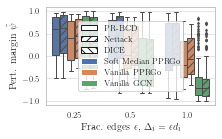

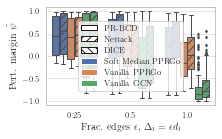

In [32]:
df_tmp = df_results.copy()
df_tmp.attack = df_tmp.attack.apply(lambda attack: attack_map[attack])

for (dataset, make_undirected), df_group in (
    df_tmp[
        df_tmp.label.isin(labels_to_plot) 
        & df_tmp.make_undirected
        & (df_tmp.epsilon.isin([0.25, 0.5, 1]))
    ].groupby(['dataset', 'make_undirected'])
):
    print(dataset, make_undirected)
    
    df_group[architecture_c] = df_group['label'].apply(transform_label)
    hue_order = list([
        transform_label(l) + ' ' + a for l in labels_to_plot if l in df_group['label'].unique() for a in attacks 
    ])
    
    colors = [list(default_colors[i]) for i in range(len(hue_order) // 2) for _ in range(len(attacks))]
    
    print(df_group.groupby(architecture_c).epsilon.count())
    
    fig, ax = mpl_latex.newfig(width=0.55, ratio_yx=0.6)
    #ax.set_title(f'{dataset_map[dataset]}, {make_undirected}')
    sns.boxplot(
        x=df_group.epsilon.rename(epsilons_c),
        y=df_group.margin,
        hue=df_group[architecture_c] + ' ' + df_group['attack'],
        hue_order=hue_order,
        fliersize=2,
        palette=colors
    )
    
    for i, bar in enumerate(ax.artists):
        if i % 2 == 0:
            pass #bar.set_hatch('*')
        else:
            bar.set_hatch('///')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    plt.ylabel(margin_c)
    mpl_latex.savefig(f'latex/assets/local_prbcd_vs_nettack_{dataset}_boxplmargin_nl', fig, close_fig=False)

    handles = []
    handles.append(matplotlib.patches.Patch(facecolor='w', edgecolor='k', label=attacks[0]))
    handles.append(matplotlib.patches.Patch(facecolor='w', edgecolor='k', hatch='///', label=attacks[1]))
    handles.append(matplotlib.patches.Patch(facecolor='w', edgecolor='k', hatch='\\\\\\', label='DICE'))
    handles.append(matplotlib.patches.Patch(facecolor=default_colors[0], label=transform_label(labels_to_plot[0])))
    handles.append(matplotlib.patches.Patch(facecolor=default_colors[1], label=transform_label(labels_to_plot[1])))
    handles.append(matplotlib.patches.Patch(facecolor=default_colors[2], label=transform_label(labels_to_plot[2])))

    ax.legend(handles=handles)
    
    mpl_latex.savefig(f'latex/assets/local_prbcd_vs_nettack_{dataset}_boxplmargin', fig, close_fig=False)
    mpl_latex.dedicated_legend_plot(
        f'latex/assets/local_prbcd_vs_nettack_{dataset}_boxplmargin_legend',
        mod_label=lambda l: l,
        ncol=3
    )
    
    figLegend = pylab.figure()
    pylab.figlegend(handles, [h._label for h in handles], loc='center', ncol=2)
    figLegend.savefig(f'latex/assets/local_prbcd_vs_nettack_{dataset}_boxplmargin_legend.pgf', dpi=300, bbox_inches='tight')
    plt.close()

citeseer True
Architecture
Soft Median PPRGo    1200
Vanilla GCN          1080
Vanilla PPRGo        1080
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


cora_ml True
Architecture
Soft Median PPRGo    1200
Vanilla GCN          1080
Vanilla PPRGo        1080
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


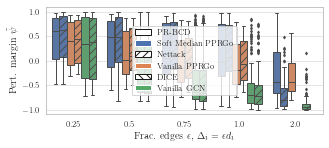

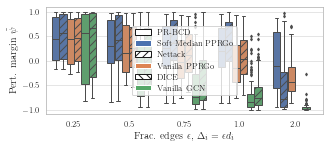

In [33]:
df_tmp = df_results.copy()
df_tmp.attack = df_tmp.attack.apply(lambda attack: attack_map[attack])

for (dataset, make_undirected), df_group in (
    df_tmp[
        df_tmp.label.isin(labels_to_plot) 
        & df_tmp.make_undirected
        & (df_tmp.epsilon.isin([0.25, 0.5, 0.75, 1, 2]))
    ].groupby(['dataset', 'make_undirected'])
):
    print(dataset, make_undirected)
    
    df_group[architecture_c] = df_group['label'].apply(transform_label)
    hue_order = list([
        transform_label(l) + ' ' + a for l in labels_to_plot if l in df_group['label'].unique() for a in attacks 
    ])
    
    colors = [list(default_colors[i]) for i in range(len(hue_order) // 2) for _ in range(len(attacks))]
    
    print(df_group.groupby(architecture_c).epsilon.count())
    
    fig, ax = mpl_latex.newfig(width=0.9, ratio_yx=0.4)
    #ax.set_title(f'{dataset_map[dataset]}, {make_undirected}')
    sns.boxplot(
        x=df_group.epsilon.rename(epsilons_c),
        y=df_group.margin,
        hue=df_group[architecture_c] + ' ' + df_group['attack'],
        hue_order=hue_order,
        fliersize=2,
        palette=colors
    )
    
    for i, bar in enumerate(ax.artists):
        if i % 2 == 0:
            pass #bar.set_hatch('*')
        else:
            bar.set_hatch('///')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    plt.ylabel(margin_c)
    mpl_latex.savefig(f'latex/assets/local_prbcd_vs_nettack_{dataset}_boxplmargin_detailed_nl', fig, close_fig=False)

    handles = []
    handles.append(matplotlib.patches.Patch(facecolor='w', edgecolor='k', label=attacks[0]))
    handles.append(matplotlib.patches.Patch(facecolor=default_colors[0], label=transform_label(labels_to_plot[0])))
    handles.append(matplotlib.patches.Patch(facecolor='w', edgecolor='k', hatch='///', label=attacks[1]))
    handles.append(matplotlib.patches.Patch(facecolor=default_colors[1], label=transform_label(labels_to_plot[1])))
    handles.append(matplotlib.patches.Patch(facecolor='w', edgecolor='k', hatch='\\\\\\', label='DICE'))
    handles.append(matplotlib.patches.Patch(facecolor=default_colors[2], label=transform_label(labels_to_plot[2])))

    ax.legend(handles=handles)
    
    mpl_latex.savefig(f'latex/assets/local_prbcd_vs_nettack_{dataset}_boxplmargin_detailed', fig, close_fig=False)

    
    figLegend = pylab.figure()
    pylab.figlegend(handles, [h._label for h in handles], loc='center', ncol=3)
    figLegend.savefig(f'latex/assets/local_prbcd_vs_nettack_{dataset}_boxplmargin_detailed_legend.pgf', dpi=300, bbox_inches='tight')
    plt.close()

# Combined Products and Papers

In [34]:
df_results[
    (df_results.dataset == 'ogbn-products')
    & ~df_results.make_undirected
].label.unique()

array(['Vanilla GCN (surrogate)', 'Soft Median PPRGo (T=1.0)',
       'Vanilla PPRGo', 'Soft Median PPRGo (T=5.0)'], dtype=object)

In [35]:
df_results[df_results.dataset == 'ogbn-papers100M'].attack.unique()

array(['LocalDICE', 'LocalBatchedPRBCD'], dtype=object)

In [36]:
df_results[
    (df_results.dataset == 'ogbn-papers100M')
    & ~df_results.make_undirected
    & (df_results.attack == 'LocalDICE')
].label.unique()

array(['Soft Median PPRGo Diffusion (T=0.1)',
       'Vanilla PPRGo Diffusion Embedding',
       'Soft Median PPRGo (T=0.5) LowAcc',
       'Soft Median PPRGo Diffusion (T=1.0)',
       'Injected Soft Median PPRGo Diffusion (T=1.0)',
       'Soft Median PPRGo (T=20.0) LowAcc', 'Vanilla PPRGo LowAcc',
       'Soft Median PPRGo (T=100.0)', 'Soft Median PPRGo (T=50.0)',
       'Soft Median PPRGo (T=500.0)', 'Soft Median PPRGo (T=200.0)'],
      dtype=object)

In [37]:
df_results[
    (df_results.dataset == 'ogbn-papers100M')
    & ~df_results.make_undirected
    & (df_results.attack == 'LocalBatchedPRBCD')
].label.unique()

array(['Soft Median PPRGo Diffusion (T=0.1)',
       'Vanilla PPRGo Diffusion Embedding',
       'Injected Soft Median PPRGo Diffusion (T=1.0)',
       'Soft Median PPRGo Diffusion (T=1.0)',
       'Soft Median PPRGo (T=20.0) LowAcc', 'Vanilla PPRGo LowAcc',
       'Soft Median PPRGo (T=50.0)', 'Soft Median PPRGo (T=200.0)',
       'Soft Median PPRGo (T=100.0)', 'Soft Median PPRGo (T=500.0)'],
      dtype=object)

In [38]:
datasets = ['ogbn-products', 'ogbn-papers100M']
attacks = ['PR-BCD', 'DICE']

labels_to_plot_per_dataset = [
    ['Soft Median PPRGo (T=1.0)',
    'Vanilla PPRGo',
    'Vanilla GCN (surrogate)'],
    #['Injected Soft Median PPRGo Diffusion (T=1.0)',
    #'Vanilla PPRGo Diffusion Embedding']
    ['Soft Median PPRGo (T=20.0) LowAcc',
    'Vanilla PPRGo LowAcc']
]

epsilon_per_dataset = [[0.1, 0.5], [0.1, 0.25]]

In [39]:
df_tmp = df_results.copy()
df_tmp.attack = df_tmp.attack.apply(lambda attack: attack_map[attack])

fig, axes = mpl_latex.newfig(width=0.55, ratio_yx=0.6, ncols=2, 
                             gridspec_kw={'wspace': 0, 'hspace': 0, 'width_ratios': [1.5, 1]})

for dataset, labels_to_plot, epsilons, ax in zip(datasets, labels_to_plot_per_dataset, epsilon_per_dataset, axes):
#for (dataset, df_group), ax in zip(df_tmp[
#    df_tmp.label.isin(labels_to_plot) 
#    & df_tmp.dataset.isin(datasets) 
#    & ~df_tmp.make_undirected
#    & (df_tmp.epsilon.isin([0.05, 0.1, 0.25]))
#].groupby(['dataset']), reversed(axes)):
    df_group = df_tmp[
        df_tmp.label.isin(labels_to_plot) 
        & (df_tmp.dataset == dataset)
        & df_tmp.dataset.isin(datasets) 
        & ~df_tmp.make_undirected
        & (df_tmp.epsilon.isin(epsilons))
    ]
    print(dataset)

    df_group[architecture_c] = df_group['label'].apply(transform_label)
    hue_order = list([
        transform_label(l) + ' ' + a for l in labels_to_plot if l in df_group['label'].unique() for a in attacks 
    ])
    colors = [list(default_colors[i]) for i in range(len(hue_order) // 2) for _ in range(len(attacks))]

    print(df_group.groupby(architecture_c).epsilon.count())

    #ax.set_title(f'{dataset_map[dataset]}, {make_undirected}')
    sns.boxplot(
        x=df_group.epsilon,
        y=df_group.margin,
        hue=df_group[architecture_c] + ' ' + df_group['attack'],
        hue_order=hue_order,
        fliersize=2,
        palette=colors,
        ax=ax
    )

    for i, bar in enumerate(ax.artists):
        if i % 2 == 0:
            pass #bar.set_hatch('*')
        else:
            bar.set_hatch('\\\\\\')

    ax.get_legend().remove()
    ax.set_xlabel('')

#mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin_no_legend', fig, close_fig=False)
axes[0].set_ylabel(margin_c)
axes[1].set_ylabel('')
axes[1].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False) # labels along the bottom edge are off
fig.text(0.5, -0.1125, epsilons_c, ha='center')


mpl_latex.savefig(f'latex/assets/local_papers_and_products_boxplmargin', fig, close_fig=True)

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
<ipython-input-39-3afe745c9bdc>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[architecture_c] = df_group['label'].apply(transform_label)


ogbn-products
Architecture
Soft Median PPRGo (T=1.0)    480
Vanilla GCN                  480
Vanilla PPRGo                480
Name: epsilon, dtype: int64
ogbn-papers100M
Architecture
Soft Median PPRGo (T=20.0) LowAcc    160
Vanilla PPRGo LowAcc                 160
Name: epsilon, dtype: int64


<ipython-input-39-3afe745c9bdc>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[architecture_c] = df_group['label'].apply(transform_label)


In [40]:
epsilon_per_dataset = [[0.1, 0.25, 0.5, 1], [0.1, 0.25, 0.5, 1]]

df_tmp = df_results.copy()
df_tmp.attack = df_tmp.attack.apply(lambda attack: attack_map[attack])

fig, axes = mpl_latex.newfig(width=1.1, ratio_yx=0.3, ncols=2, 
                             gridspec_kw={'wspace': 0, 'hspace': 0, 'width_ratios': [1.5, 1]})

for dataset, labels_to_plot, epsilons, ax in zip(datasets, labels_to_plot_per_dataset, epsilon_per_dataset, axes):
#for (dataset, df_group), ax in zip(df_tmp[
#    df_tmp.label.isin(labels_to_plot) 
#    & df_tmp.dataset.isin(datasets) 
#    & ~df_tmp.make_undirected
#    & (df_tmp.epsilon.isin([0.05, 0.1, 0.25]))
#].groupby(['dataset']), reversed(axes)):
    df_group = df_tmp[
        df_tmp.label.isin(labels_to_plot) 
        & (df_tmp.dataset == dataset)
        & df_tmp.dataset.isin(datasets) 
        & ~df_tmp.make_undirected
        & (df_tmp.epsilon.isin(epsilons))
    ]
    print(dataset)

    df_group[architecture_c] = df_group['label'].apply(transform_label)
    hue_order = list([
        transform_label(l) + ' ' + a for l in labels_to_plot if l in df_group['label'].unique() for a in attacks 
    ])
    colors = [list(default_colors[i]) for i in range(len(hue_order) // 2) for _ in range(len(attacks))]

    print(df_group.groupby(architecture_c).epsilon.count())

    #ax.set_title(f'{dataset_map[dataset]}, {make_undirected}')
    sns.boxplot(
        x=df_group.epsilon,
        y=df_group.margin,
        hue=df_group[architecture_c] + ' ' + df_group['attack'],
        hue_order=hue_order,
        fliersize=2,
        palette=colors,
        ax=ax
    )

    for i, bar in enumerate(ax.artists):
        if i % 2 == 0:
            pass #bar.set_hatch('*')
        else:
            bar.set_hatch('\\\\\\')

    ax.get_legend().remove()
    ax.set_xlabel('')

#mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin_no_legend', fig, close_fig=False)
axes[0].set_ylabel(margin_c)
axes[1].set_ylabel('')
axes[1].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False) # labels along the bottom edge are off
fig.text(0.5, -0.1125, epsilons_c, ha='center')


mpl_latex.savefig(f'latex/assets/local_papers_and_products_boxplmargin_detailed', fig, close_fig=True)

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
<ipython-input-40-0d765f116d13>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[architecture_c] = df_group['label'].apply(transform_label)
<ipython-input-40-0d765f116d13>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

ogbn-products
Architecture
Soft Median PPRGo (T=1.0)    960
Vanilla GCN                  960
Vanilla PPRGo                960
Name: epsilon, dtype: int64
ogbn-papers100M
Architecture
Soft Median PPRGo (T=20.0) LowAcc    320
Vanilla PPRGo LowAcc                 320
Name: epsilon, dtype: int64


# Papers Accuracy vs. Robustness

In [41]:
dataset = 'ogbn-papers100M'
attacks = ['PR-BCD', 'DICE']

labels_to_plot = [
    'Soft Median PPRGo (T=20.0) LowAcc',
    'Soft Median PPRGo (T=50.0)',
    'Soft Median PPRGo (T=100.0)',
    'Soft Median PPRGo (T=200.0)',
    'Soft Median PPRGo (T=500.0)',
    'Vanilla PPRGo LowAcc'
]

epsilons = [0.05, 0.1, 0.25, 0.5]

In [42]:
df_results[
    (df_results.dataset == 'ogbn-papers100M')
    & ~df_results.make_undirected
    & (df_results.attack == 'LocalBatchedPRBCD')
].label.unique()

array(['Soft Median PPRGo Diffusion (T=0.1)',
       'Vanilla PPRGo Diffusion Embedding',
       'Injected Soft Median PPRGo Diffusion (T=1.0)',
       'Soft Median PPRGo Diffusion (T=1.0)',
       'Soft Median PPRGo (T=20.0) LowAcc', 'Vanilla PPRGo LowAcc',
       'Soft Median PPRGo (T=50.0)', 'Soft Median PPRGo (T=200.0)',
       'Soft Median PPRGo (T=100.0)', 'Soft Median PPRGo (T=500.0)'],
      dtype=object)

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
<ipython-input-43-a2db13a7c96f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[architecture_c] = df_group['label'].apply(transform_label)


ogbn-papers100M
Architecture
Soft Median PPRGo (T=100.0)          320
Soft Median PPRGo (T=20.0) LowAcc    320
Soft Median PPRGo (T=200.0)          320
Soft Median PPRGo (T=50.0)           320
Soft Median PPRGo (T=500.0)          320
Vanilla PPRGo LowAcc                 320
Name: epsilon, dtype: int64


Text(0, 0.5, 'Pert. margin $\\tilde{\\psi}$')

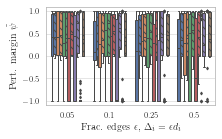

In [43]:
df_tmp = df_results.copy()
df_tmp.attack = df_tmp.attack.apply(lambda attack: attack_map[attack])

fig, ax = mpl_latex.newfig(width=0.55, ratio_yx=0.6)

df_group = df_tmp[
    df_tmp.label.isin(labels_to_plot) 
    & (df_tmp.dataset == dataset)
    & df_tmp.dataset.isin(datasets) 
    & ~df_tmp.make_undirected
    & (df_tmp.epsilon.isin(epsilons))
]
print(dataset)

df_group[architecture_c] = df_group['label'].apply(transform_label)
hue_order = list([
    transform_label(l) + ' ' + a for l in labels_to_plot if l in df_group['label'].unique() for a in attacks 
])
colors = [list(default_colors[i]) for i in range(len(hue_order) // 2) for _ in range(len(attacks))]

print(df_group.groupby(architecture_c).epsilon.count())

#ax.set_title(f'{dataset_map[dataset]}, {make_undirected}')
sns.boxplot(
    x=df_group.epsilon,
    y=df_group.margin,
    hue=df_group[architecture_c] + ' ' + df_group.attack,
    hue_order=hue_order,
    fliersize=2,
    palette=colors,
    ax=ax
)

for i, bar in enumerate(ax.artists):
    if i % 2 == 0:
        pass #bar.set_hatch('*')
    else:
        bar.set_hatch('\\\\\\')

ax.get_legend().remove()
ax.set_xlabel(epsilons_c)

#mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin_no_legend', fig, close_fig=False)
ax.set_ylabel(margin_c)

#mpl_latex.savefig(f'latex/assets/local_papers_and_products_boxplmargin', fig, close_fig=True)

In [44]:
accuracy_by_temperature = defaultdict(lambda: 0.574854, {
    20: 0.505795,
    50: 0.524676,
    100: 0.536676,
    200: 0.549851,
    500: 0.568453
})

accuracy_mean_by_temperature = defaultdict(lambda: 0.598534, {
    20: 0.511398,
    50: 0.528018,
    100: 0.540876,
    200: 0.553046,
    500: 0.572579
})

accuracy_sem_by_temperature = defaultdict(lambda: 0.0205098 / 3, {
    20: 0.00494018 / 3,
    50: 0.00373648 / 3,
    100: 0.00466367 / 3,
    200: 0.00444961 / 3,
    500: 0.00435728 / 3
})

accuracy_by_temperature

defaultdict(<function __main__.<lambda>()>,
            {20: 0.505795,
             50: 0.524676,
             100: 0.536676,
             200: 0.549851,
             500: 0.568453})

In [45]:
df_tmp = df_results.copy()
df_tmp.attack = df_tmp.attack.apply(lambda attack: attack_map[attack])

fig, ax = mpl_latex.newfig(width=0.9, ratio_yx=0.4)

df_group = df_tmp[
    df_tmp.label.isin(labels_to_plot) 
    & (df_tmp.dataset == dataset)
    & df_tmp.dataset.isin(datasets) 
    & ~df_tmp.make_undirected
    & (df_tmp.epsilon.isin(epsilons))
    & (df_group.attack == attacks[0])
]
print(dataset)

df_group['temperature'] = df_tmp.label.apply(lambda label: (
    float(re.search(r'T=([0-9.]*)', label)[0][2:]) 
    if 'Median' in label else np.nan)
)


df_group['accuracy'] = df_group.temperature.apply(lambda temperature: accuracy_by_temperature[temperature])
df_group['accuracy_mean'] = df_group.temperature.apply(lambda temperature: accuracy_mean_by_temperature[temperature])
df_group['accuracy_sem'] = df_group.temperature.apply(lambda temperature: accuracy_sem_by_temperature[temperature])

df_group[architecture_c] = df_group['label'].apply(transform_label)
hue_order = list([
    transform_label(l) + ' ' + a for l in labels_to_plot if l in df_group['label'].unique() for a in attacks 
])
colors = [list(default_colors[i]) for i in range(len(hue_order) // 2) for _ in range(len(attacks))]

print(df_group.groupby(architecture_c).epsilon.count())

#ax.set_title(f'{dataset_map[dataset]}, {make_undirected}')
df_group = df_group.sort_values(['temperature', 'epsilon'])
df_group['temperature_str'] = df_group.temperature.apply(
    lambda temperature: f'$T={temperature}$' if temperature == temperature else 'Vanilla'
)

sns.boxplot(
    x=df_group.temperature_str,
    y=df_group.margin,
    hue=df_group.epsilon.apply(lambda epsilon: rf'$\epsilon={epsilon}$'),
    #hue_order=hue_order,
    fliersize=2,
    #palette=colors,
    ax=ax
)

df_tmp = df_group.drop_duplicates(['temperature_str', 'accuracy_mean'], keep='last').sort_values('temperature')
ax_twin = ax.twinx()
#line_handle = plt.errorbar(
#    df_tmp.temperature_str,
#    df_tmp.accuracy_mean,
#    df_tmp.accuracy_sem,
#    label='Accuracy',
#    color='k',
#    linewidth=1.5
#)
line_handle = ax_twin.plot(df_tmp.temperature_str, df_tmp.accuracy, color='k', marker='x', label='Accuracy')
ax_twin.set_ylabel('Accuracy')
ax_twin.grid(False)

#for i, bar in enumerate(ax.artists):
#    if i % 2 == 0:
#        pass #bar.set_hatch('*')
#    else:
#        bar.set_hatch('\\\\\\')

ax.get_legend().remove()
ax.set_xlabel('')
#ax.set_xlabel('Temperature $T$')
ax.set_ylabel(margin_c)

mpl_latex.savefig(f'latex/assets/local_products_boxplmargin_temperature_nl', fig, close_fig=True)

handles, _ = ax.get_legend_handles_labels()
handles.append(line_handle[0])
          
figLegend = pylab.figure()
pylab.figlegend(handles, [h._label for h in handles], loc='center', ncol=len(epsilons) + 1)
figLegend.savefig(f'latex/assets/local_products_boxplmargin_temperature_legend.pgf', dpi=300, bbox_inches='tight')

plt

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
<ipython-input-45-55c51690ed62>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_group = df_tmp[
<ipython-input-45-55c51690ed62>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['temperature'] = df_tmp.label.apply(lambda label: (
<ipython-input-45-55c51690ed62>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

ogbn-papers100M
Architecture
Soft Median PPRGo (T=100.0)          160
Soft Median PPRGo (T=20.0) LowAcc    160
Soft Median PPRGo (T=200.0)          160
Soft Median PPRGo (T=50.0)           160
Soft Median PPRGo (T=500.0)          160
Vanilla PPRGo LowAcc                 160
Name: epsilon, dtype: int64


<module 'matplotlib.pyplot' from '/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 864x533.981 with 0 Axes>

In [46]:
df_group['label']

15732    Soft Median PPRGo (T=20.0) LowAcc
15733    Soft Median PPRGo (T=20.0) LowAcc
15731    Soft Median PPRGo (T=20.0) LowAcc
15730    Soft Median PPRGo (T=20.0) LowAcc
15729    Soft Median PPRGo (T=20.0) LowAcc
                       ...                
16611                 Vanilla PPRGo LowAcc
16604                 Vanilla PPRGo LowAcc
16633                 Vanilla PPRGo LowAcc
16634                 Vanilla PPRGo LowAcc
16635                 Vanilla PPRGo LowAcc
Name: label, Length: 960, dtype: object

In [47]:
seml.get_results('neurips21_local_attack_coraciteseer',
                                               to_data_frame=True,
                                               fields=['batch_id', 'slurm', 'config', 'result', 'stats']).to_csv('cache/coraciteseer_pprgo.csv')

  0%|          | 0/297 [00:00<?, ?it/s]

  0%|          | 0/297 [00:00<?, ?it/s]

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')
